In [1]:
%pylab inline
from retrieve_model_tools import retrieve_NGram, retrieve_SkipGramNN
from dynamic_programming_tools import shortest_path
from plot_embedding_tools import plot_vec

Populating the interactive namespace from numpy and matplotlib


In [2]:
ngram = retrieve_NGram()
nn = retrieve_SkipGramNN()

regularize_0-learn_rate_0.00-use_letternames_1-bigram_0-opt_algorithm_cg-max_iter_2000-retrieve_model_0-window_1-duplicate_by_rotate_0-layer1_sz_20-ba-2015-09-29_14-35-20
...retrieve_NGram fname bigram-rock.pkl
Ngram fpath data/bigram-rock.pkl
retrieve_NGram, # of syms 122
regularize_0-learn_rate_0.00-use_letternames_1-bigram_0-opt_algorithm_cg-max_iter_2000-retrieve_model_0-window_1-duplicate_by_rotate_0-layer1_sz_20-ba-2015-09-29_14-35-20
...SkipGramNNWrapper, directory /Users/czhuang/Dropbox/MuseAmi/dev/Music_Education_Hackathon_Workshop
fname:  data/embedding-rock-rn-10-500.pkl
SkipGramNNWrapper, # of syms 122


In [3]:
print set(ngram.syms)

set(['Fmaj7', 'G#o7', 'G7', 'Bm', 'G9', 'E-m', 'B-7', 'G-', 'D', 'B-/F', 'F#m7', 'B-/D', 'B--7', 'CmM7', 'E-7', 'E7', 'CmM9', 'E-/B-', 'B-', 'D/F#', 'B7', 'B-m7', 'Gm', 'CmM7/B', 'Gsus4', 'Gm7/B-', 'E/G#', 'E-', 'F#o7', 'A/C#', 'C/E', 'C/G', 'Dm7/F', 'Dm7/A', 'A-7', 'C', 'G', 'F#o7/E-', 'G+11', 'G7/F', 'G7/D', 'G7/B', 'Em', 'F#dim', 'E7/G#', 'Em7', 'Cmaj7', 'Dm7', 'Em/G', 'Dm9', 'Em/B', 'FM9', 'Am/C', 'Am/E', 'C7', 'Fm', 'B', 'F', 'Em7/G', 'E-/G', 'Gm7', 'C#dim', 'G11', 'Cm', 'F7', 'A-/C', 'G/D', 'Gm/B-', 'G/B', 'Am9', 'F#', 'Bm7', 'Am7', 'Bm/F#', 'Cm/E-', 'Ddim', 'Fmaj7/C', 'Fmaj7/A', 'E/B', 'Dm', 'A-', 'A7', 'F#o7/C', 'A9', 'A', 'Bo7/A-', 'E', 'FmM7/A-', 'FmM7', 'Gm/D', 'C7/B-', 'D-', 'Fm/C', 'Am', 'F/A', 'F/C', 'D7'])


In [4]:
# Randomly generate chord sequences
seqs = [ngram.gen_seq(5) for i in range(7)]
for seq in seqs: print seq

['C', 'Am', 'Dm', 'G', 'B-']
['C', 'Am7', 'C', 'C', 'F/A']
['F', 'C', 'F', 'C', 'F']
['C', 'G', 'C', 'F', 'C']
['C', 'Gm7', 'F', 'Am', 'F']
['C', 'G', 'F', 'C', 'F']
['C', 'Am', 'F', 'Am/E', 'Dm7']


In [5]:
# Fix certain chords and solve for the most optimal sequence
# TODO: should also sample ...
fixed = {0:'Cm', 3:'F#o7/C', 6:'Cm'}
seq, _ = shortest_path(ngram, fixed)
print seq

['Cm', 'F', 'G', 'F#o7/C', 'C', 'B-', 'Cm']


=== PCA projection ===
[ 0.14573162  0.13326428]
choosen explained: 0.28
# of syms: 122
(122, 2)


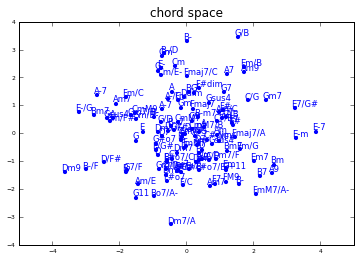

In [6]:
# Just to demystify 
plot_vec(nn.W1, nn.syms)

In [7]:
# Query what chords are considered similar
chs = nn.most_similar('F')
print chs

[('F7', 0.7790095328251944), ('F/A', 0.6653293684135009), ('A-', 0.5924704158092344)]


In [8]:
chs = nn.most_similar('B-')
print chs

[('E-', 0.7526945120967439), ('Gm', 0.7243736027470851), ('G/B', 0.6465763195449021)]


In [9]:
# Transform the seq
original_seq = ['Cm', 'F', 'G', 'F#o7/C', 'C', 'B-', 'Cm']
# want to change the second chord 'F'
sub_ind = 2
chs = nn.most_similar(original_seq[sub_ind])
transformations = []
for ch in chs:
    fixed = {sub_ind:ch[0]}
    lb = sub_ind - 1
    if lb >= 0:
        fixed[lb] = original_seq[lb]
    ub = sub_ind + 1
    if ub < len(original_seq):
        fixed[ub] = original_seq[ub]
    seq, _ = shortest_path(ngram, fixed, sub_ind, original_seq=original_seq)
    transformations.append(seq)
print 'original seq:', original_seq
for seq in transformations:
    print 'transformed: ', seq

original seq: ['Cm', 'F', 'G', 'F#o7/C', 'C', 'B-', 'Cm']
transformed:  ['Cm', 'F', 'A-7', 'Cm', 'C', 'B-', 'Cm']
transformed:  ['Cm', 'C', 'Dm7', 'G', 'C', 'B-', 'Cm']
transformed:  ['Cm', 'Cm', 'A-', 'Cm', 'C', 'B-', 'Cm']
